In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm

In [5]:
file_path = '/content/pcos_dataset_2000_rows (1).csv'

try:
  df = pd.read_csv(file_path)
except FileNotFoundError:
  print(f"File not found: {file_path}")

In [6]:
df.sample(5)

,Age,Weight_kg,Height_cm,Irregular_Periods,Acne,Hair_Growth,Hair_Loss,Weight_Gain,Stress_Level,Physical_Activity,Family_History_PCOS,Blood_Sugar_mg_dl,PCOS_Risk
447,31,109,149,Yes,Mild,No,No,Yes,Medium,Moderate,Yes,82,Medium
1310,17,51,173,No,Mild,No,Yes,Yes,Medium,Moderate,No,184,Medium
737,31,50,156,No,Mild,Yes,Yes,Yes,High,High,Yes,123,Medium
300,20,95,177,Yes,Mild,No,No,Yes,Low,High,Yes,82,Medium
1253,44,96,144,No,NaN,Yes,Yes,No,Medium,High,No,179,Low


In [10]:
#basic info
def Basic_info(df):
  null_values = df.isnull().sum()
  summary = df.describe(include='all')
  print(f"Dataset Shape: {df.shape}\n")
  print(summary)
  print(f"Duplicate Rows: {df.duplicated().sum()}")
  print(f"null values {null_values}")

In [11]:
#gathering Basic info by Calling function
Basic_info(df)

Dataset Shape: (2000, 13)

                Age    Weight_kg    Height_cm Irregular_Periods  Acne  \
count   2000.000000  2000.000000  2000.000000              2000  1340   
unique          NaN          NaN          NaN                 2     2   
top             NaN          NaN          NaN                No  Mild   
freq            NaN          NaN          NaN              1014   691   
mean      29.722500    74.131500   159.509500               NaN   NaN   
std        8.891008    20.039985    11.356822               NaN   NaN   
min       15.000000    40.000000   140.000000               NaN   NaN   
25%       22.000000    57.000000   150.000000               NaN   NaN   
50%       30.000000    74.000000   159.000000               NaN   NaN   
75%       37.000000    91.000000   169.000000               NaN   NaN   
max       44.000000   109.000000   179.000000               NaN   NaN   

       Hair_Growth Hair_Loss Weight_Gain Stress_Level Physical_Activity  \
count         2000   

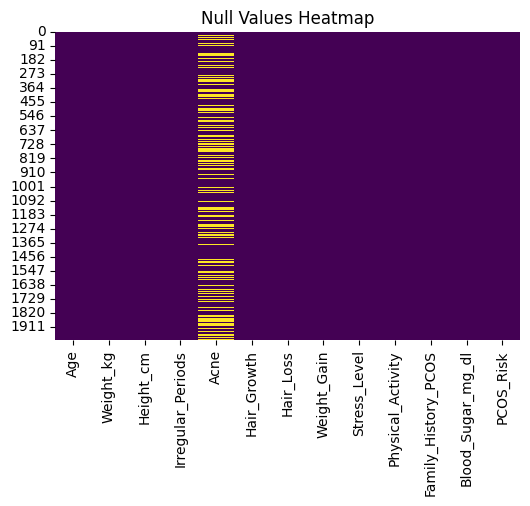

In [14]:
#null_values
plt.figure(figsize=(6,4))
sns.heatmap(df.isnull(),cbar=False,cmap='viridis')
plt.title('Null Values Heatmap')
plt.show()

['Age', 'Weight_kg', 'Height_cm', 'Blood_Sugar_mg_dl']


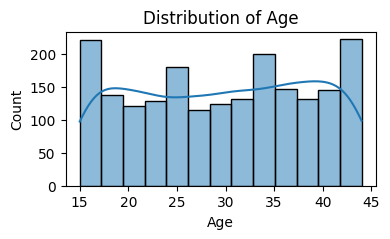

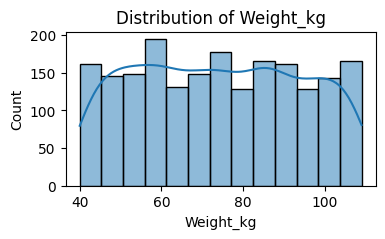

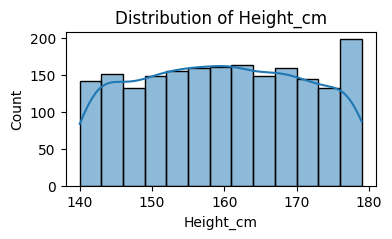

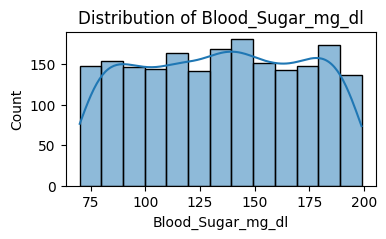

In [19]:
#numerical_cols analysis
numerical_cols = df.select_dtypes(include=['int64','float64']).columns
print(numerical_cols.tolist())

for col in numerical_cols:
    plt.figure(figsize=(4, 2))
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()

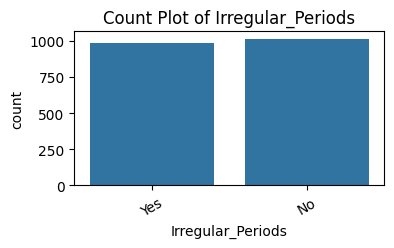

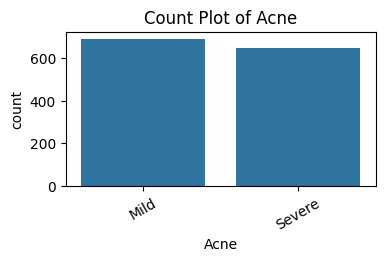

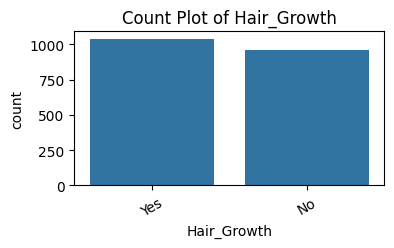

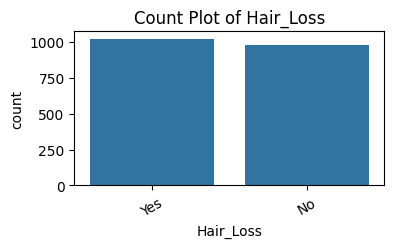

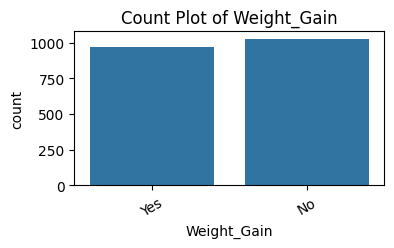

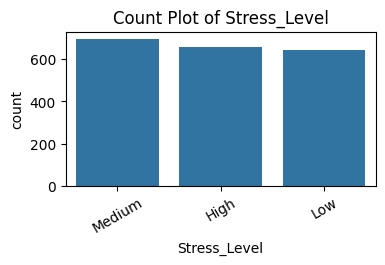

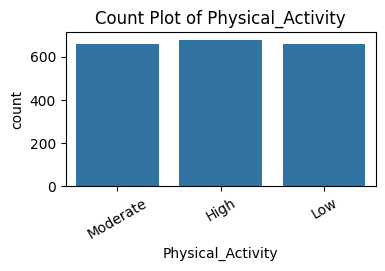

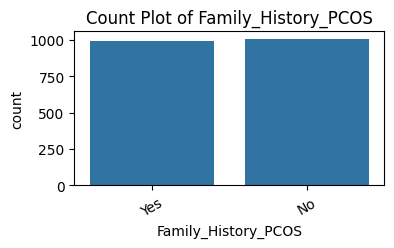

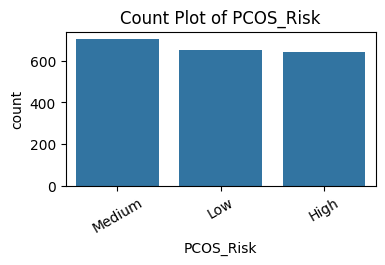

In [21]:
#categorical cols analysis
categorical_cols = df.select_dtypes(include=['object']).columns

for col in categorical_cols:
    plt.figure(figsize=(4, 2))
    sns.countplot(x=df[col])
    plt.title(f"Count Plot of {col}")
    plt.xticks(rotation=30)
    plt.show()

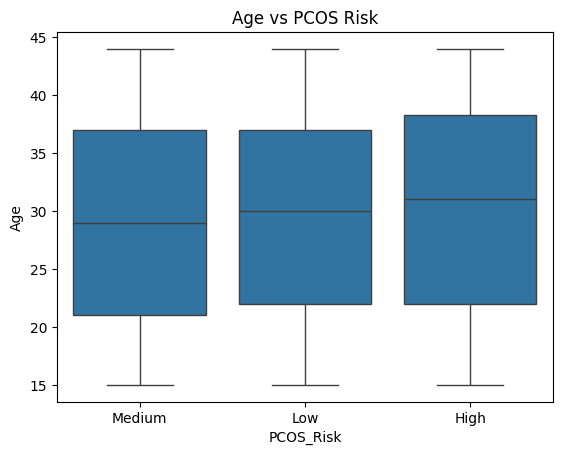

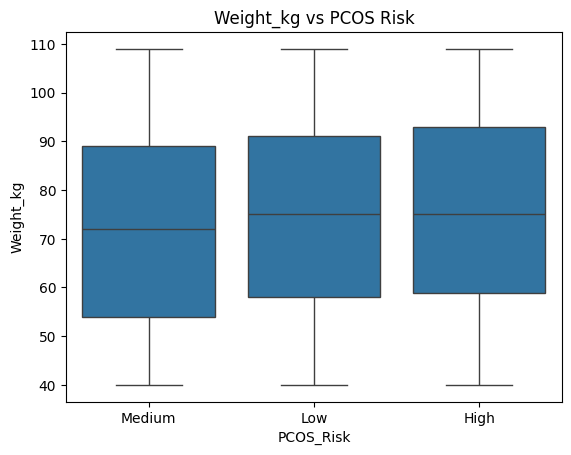

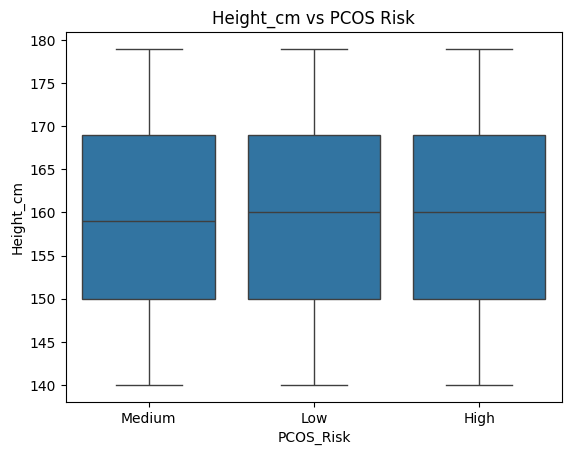

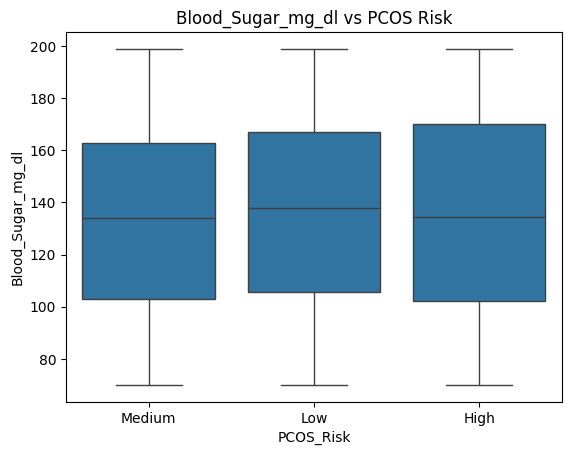

In [22]:
#try to understand how numerical columns impacted the PCOS target column
for col in numerical_cols:
  plt.figure(figsize=(4,2))
  sns.boxplot(x="PCOS_Risk",y=col, data=df)
  plt.title(f"{col} vs PCOS Risk")
  plt.show()

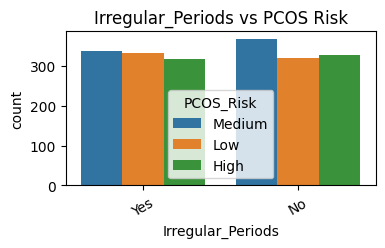

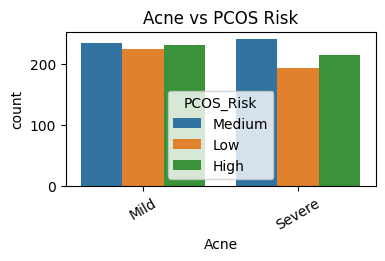

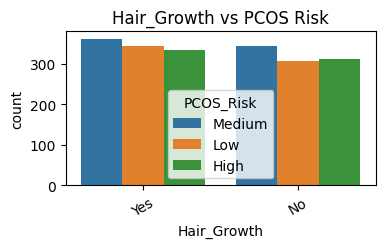

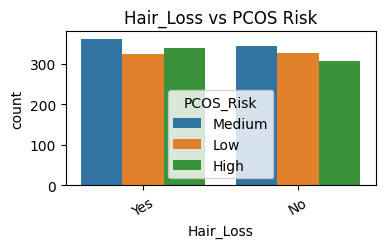

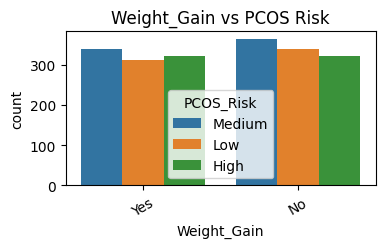

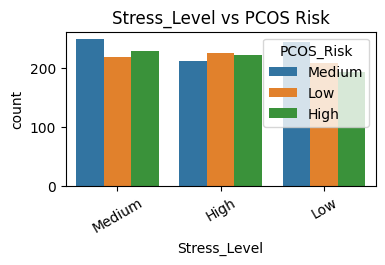

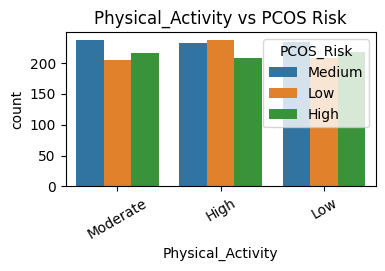

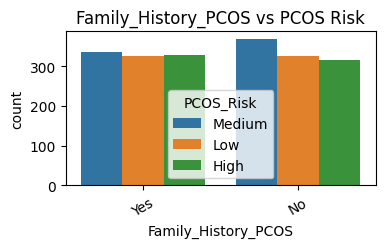

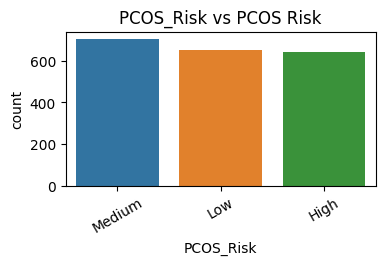

In [23]:
for col in categorical_cols:
  plt.figure(figsize=(4,2))
  sns.countplot(x=col, hue="PCOS_Risk", data=df)
  plt.title(f"{col} vs PCOS Risk")
  plt.xticks(rotation=30)
  plt.show()

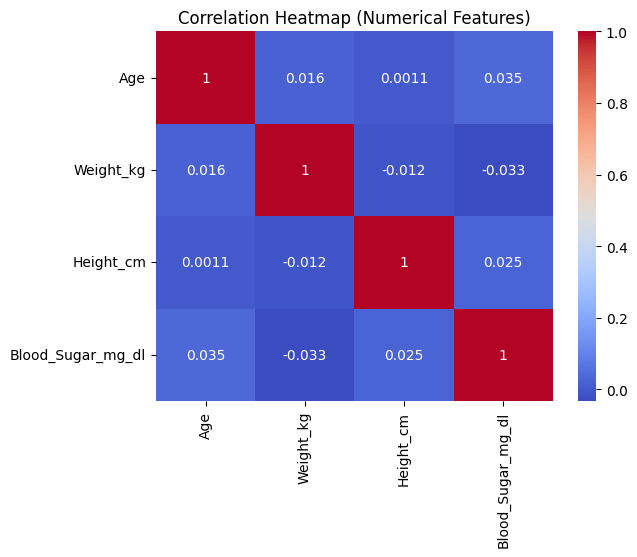

In [24]:
#now find out the Correlation
plt.figure()
sns.heatmap(
    df[numerical_cols].corr(),
    annot=True,
    cmap="coolwarm"
)
plt.title("Correlation Heatmap (Numerical Features)")
plt.show()

#what insights we can find out

Irregular periods, weight gain, and blood sugar show strong association with PCOS risk

Lifestyle factors (stress & physical activity) impact risk trends

Data supports ANN-based non-linear modeling